# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [2]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

bash: строка 1: gdown: команда не найдена


CalledProcessError: Command 'b'gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM\n'' returned non-zero exit status 127.

Начнем с необходимых приготовлений.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [4]:
coins = pd.read_csv("coins.csv")
coins.set_index('date')

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.300000,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.300000,135.980000,132.100000,134.210000,0.0,1.500520e+09
2013-04-28,4.300000,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.300000,4.400000,4.180000,4.350000,0.0,7.377340e+07
2013-04-29,134.440000,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.440000,147.490000,134.000000,144.540000,0.0,1.491160e+09
2013-04-29,4.370000,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.370000,4.570000,4.230000,4.380000,0.0,7.495270e+07
2013-04-30,144.000000,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.000000,146.930000,134.050000,139.000000,0.0,1.597780e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06,0.293325,4830.0,2.312763e+05,659.0,XLM,Stellar,0.293325,0.299955,0.289500,0.298269,51165000.0,5.450080e+09
2018-06-06,0.039586,7205.0,4.947760e+06,18228.0,XVG,Verge,0.039586,0.039737,0.037680,0.038797,9307450.0,5.959400e+08
2018-06-06,239.760000,10687.0,3.986308e+07,96516.0,ZEC,Zcash,239.750000,240.340000,229.210000,236.050000,56887000.0,9.769940e+08


Посмотрим что получилось

In [5]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [6]:
print(f"В датасете представлено {len(set(coins['name']))} различных монет.")

В датасете представлено 70 различных монет.


### 2. За какой период данные мы имеем? (0.4 балла)

In [7]:
lst = coins['date']
mn = min(lst)
mx = max(lst)
print(f"С {mn} по {mx}")

С 2013-04-28 по 2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [8]:
missing_date = coins[coins.isnull().any(axis = 1)]
print(missing_date)
# Пропуски есть в столбцах price, txCount, txVolume, activeAddresses. При сортировке данных для каждой монеты отдельно можно заметить, что пропуски данных есть
# только в первые несколько дней торговли. Следовательно, можно сделать вывод, что эти пропуски появляются из-за того, что монету только размещают на бирже.
# Данный процесс называется "Листинг".

             date      price  txCount  txVolume  activeAddresses symbol  \
1816   2014-08-05   0.002976      NaN       NaN              NaN    XLM   
1824   2014-08-06   0.002373      NaN       NaN              NaN    XLM   
1832   2014-08-07   0.002686      NaN       NaN              NaN    XLM   
1840   2014-08-08   0.002493      NaN       NaN              NaN    XLM   
1848   2014-08-09   0.002884      NaN       NaN              NaN    XLM   
...           ...        ...      ...       ...              ...    ...   
37437  2018-06-04        NaN    847.0       NaN            698.0    VEN   
37470  2018-06-05  13.580000      NaN       NaN              NaN    EOS   
37507  2018-06-05        NaN    632.0       NaN            588.0    VEN   
37540  2018-06-06  14.250000      NaN       NaN              NaN    EOS   
37577  2018-06-06        NaN    603.0       NaN            528.0    VEN   

          name       open       high        low      close        volume  \
1816   Stellar   0.0029

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [9]:
temp_date = coins[coins['high'] == coins['high'].max()]
print(temp_date['name'].values[0])
print(f"Максимальная цена была достигнута {temp_date['date'].values[0]}, равная {temp_date['high'].values[0]}")

Bitcoin
Максимальная цена была достигнута 2017-12-17, равная 20089.0


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

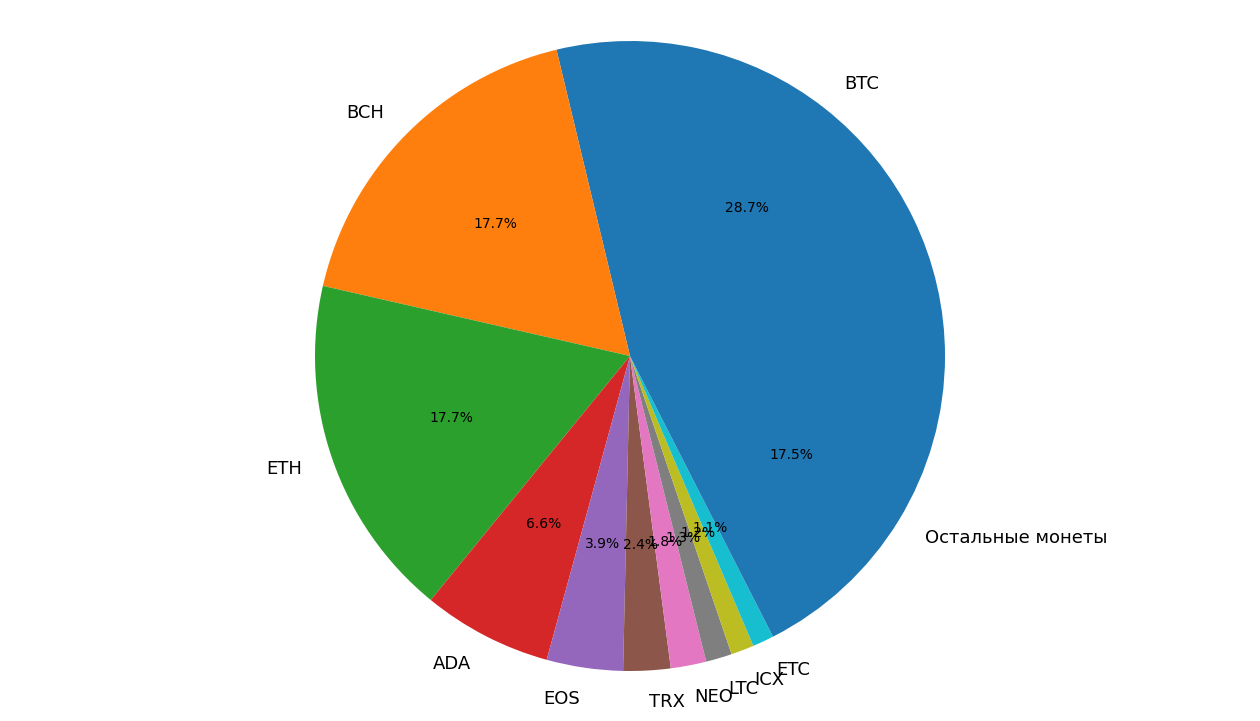

<Figure size 640x480 with 0 Axes>

In [10]:
labels = list(set(coins['symbol']))
def get_mean_market(symbol):
    return coins[coins['symbol'] == symbol]['market'].mean()
labels = sorted(labels, key = lambda x: get_mean_market(x), reverse=True)
top = 10
markets = [get_mean_market(label) for label in labels]
labels = labels[:top]
labels.append('Остальные монеты')
markets[top] = sum(markets[top:])
markets = markets[:top + 1]
plt.rc('xtick', labelsize = 13)
plt.rc('font', size = 10)
figure, conf = plt.subplots(
    figsize = (16, 9),
    dpi = 100,
)
conf.pie(markets, labels = labels, autopct = '%1.1f%%')
plt.figure()

conf.axis('equal')
plt.show()


## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [11]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    df = coins[coins['symbol'] == symbol]
    df = df[(df['date'] <= end_date) & (df['date'] >= start_date)]
    x_ticks = df['date'][::len(df['date']) // 8]

    start_min_price = df[df['date'] == df['date'].min()].low.min()
    start_max_price = df[df['date'] == df['date'].min()].high.max()
    end_min_price = df[df['date'] == df['date'].max()].low.min()
    end_max_price = df[df['date'] == df['date'].max()].high.max()
    fig = plt.figure(
        figsize=(16, 9),
        facecolor='whitesmoke',
        dpi=100
    )
    plt.rc('font', size = 8)
    plt.rc('xtick', labelsize = 8)
    plt.rc('ytick', labelsize = 12)

    k = 4

    plt.title(f'График цен валюты {symbol}')
    
    plt.plot(
        df['date'][::k],
        df['open'][::k],
        label = 'Цена при открытии'
    )
    plt.xlabel("date")
    plt.ylabel("price")
    plt.plot(
        df['date'][::k],
        df['close'][::k],
        label = 'Цена при закрытии'
    )

    plt.axhline(y = start_min_price, color = 'green', linestyle = '--', label = 'Мин. цена в день открытия')
    plt.axhline(y = start_max_price, color = 'green', label = 'Макс. цена в день открытия')
    plt.axhline(y = end_min_price, color = 'red', linestyle = '--', label = 'Мин. цена в день закрытия')
    plt.axhline(y = end_max_price, color = 'red', label = 'Макс. цена в день закрытия')

    plt.legend()
    plt.xticks(ticks = x_ticks)
    plt.grid()
    plt.figure(figsize=(20,20))
    plt.show()

Посмотрим, что получилось:

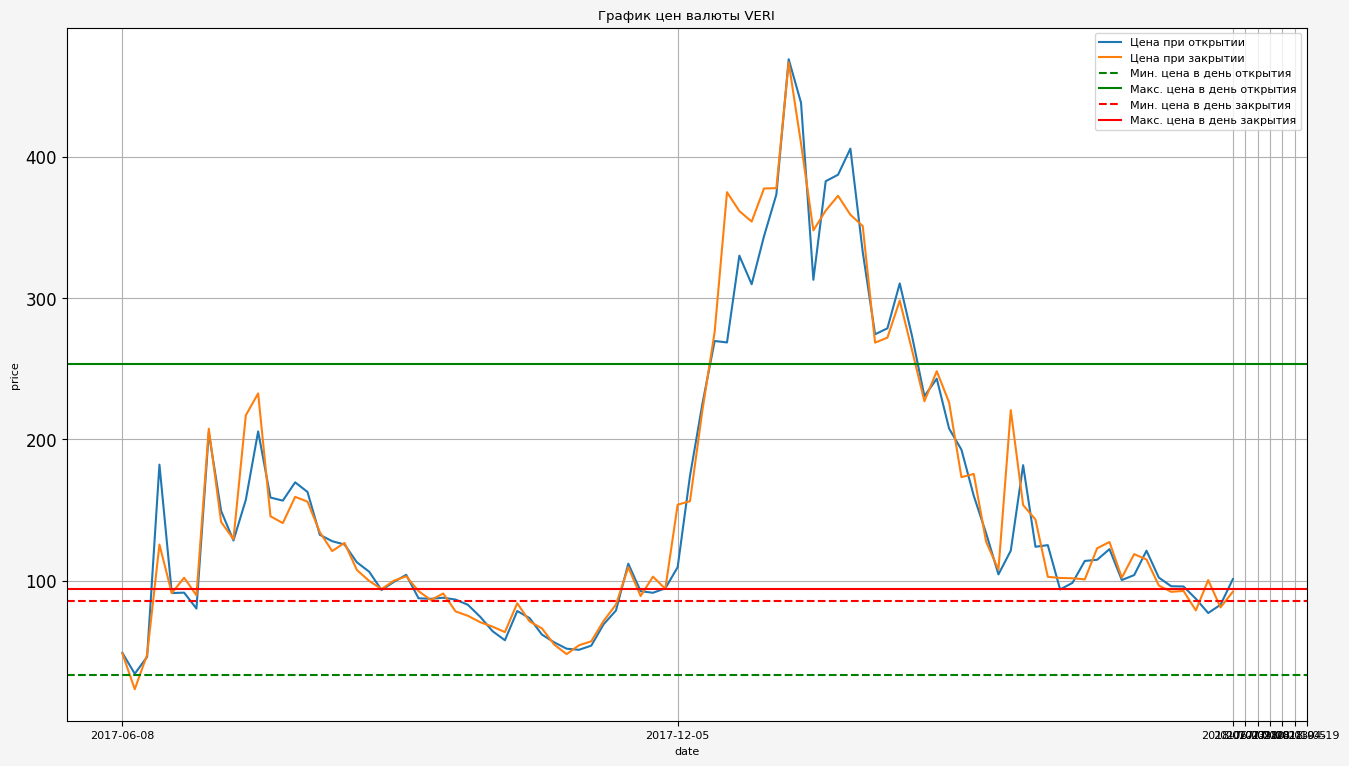

<Figure size 2000x2000 with 0 Axes>

In [12]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [13]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    df = coins[coins['symbol'] == symbol]
    df = df[(df['date'] <= end_date) & (df['date'] >= start_date)]

    pnd_list = []
    for ind, row in df.iterrows():
        pnd_list.append(row.high / max(row.open, row.close))
    df['pnd'] = pd.Series(pnd_list, index = df.index)
    ans_day = df[df['pnd'] == df['pnd'].max()]
    if ans_day.empty:
        print(f"Не удалось найти pump'n'dump для монеты {symbol} на промежутке {start_date} - {end_date}")
    else:
        ans_day = ans_day.iloc[0]
        print(f"Для монеты {symbol} самый сильный pump'n'dump в {ans_day.date}.")
        print(f"Цена при открытии: {ans_day.open}")
        print(f"Цена при закрытии: {ans_day.close}")
        print(f"Максимальная цена: {ans_day.high}")
        print(f"Величина pnd: {ans_day.pnd}")

In [14]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

Для монеты BTC самый сильный pump'n'dump в 2017-11-29.
Цена при открытии: 10077.4
Цена при закрытии: 9888.61
Максимальная цена: 11517.4
Величина pnd: 1.1428940004366206


Сравните эти значения для разных монет:

In [15]:
def get_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    df = coins[coins['symbol'] == symbol]
    df = df[(df['date'] <= end_date) & (df['date'] >= start_date)]

    pnd_list = []
    for ind, row in df.iterrows():
        pnd_list.append(row.high / max(row.open, row.close))
    df['pnd'] = pd.Series(pnd_list, index = df.index)
    ans_day = df[df['pnd'] == df['pnd'].max()]
    if ans_day.empty:
        return -1
    else:
        ans_day = ans_day.iloc[0]
        return ans_day.pnd

symbols = set(coins['symbol'])
pairlist = [] # пары (название_монеты, pnd)
start_date = coins['date'].min()
end_date = coins['date'].max()
for symbol in symbols:
    pnd = get_most_severe_pump_and_dump(coins, symbol, start_date, end_date)
    if (pnd != -1):
        pairlist.append([symbol, pnd])
pairlist.sort(key = lambda x: x[1], reverse = True)
for pair in pairlist[:10]:
    print(f"Для монеты {pair[0]} pnd равен {pair[1]}")

Для монеты VERI pnd равен 33.549253731343285
Для монеты DGB pnd равен 32.11914893617021
Для монеты FUN pnd равен 12.490562327959102
Для монеты TRX pnd равен 9.651010376843255
Для монеты BTM pnd равен 7.177933491925104
Для монеты BTG pnd равен 5.777033492822967
Для монеты RHOC pnd равен 5.075208458226606
Для монеты DASH pnd равен 4.7824267782426775
Для монеты LRC pnd равен 4.528409090909091
Для монеты PIVX pnd равен 4.384740637357525


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [16]:
def compute_roi(coins, investments, start_date, end_date):
    if (start_date < coins['date'].min()):
        start_date = coins['date'].min()
    if (end_date > coins['date'].max()):
        end_date = coins['date'].max()
    if (start_date > end_date):
        print(f"Ошибка: start_date > end_date")
        return
    print(coins['date'].max())
    last_price = sum(investments.values())
    investment_counts = dict()
    for a, b in investments.items():
        investment_counts[a] = int(b) / int(coins[(coins['date'] == start_date) & (coins['symbol'] == a)].iloc[0].open)
    new_price = 0
    for symbol, count in investment_counts.items():
        new_price += int(coins[(coins['date'] == end_date) & (coins['symbol'] == symbol)].iloc[0].close) * count
    if new_price < last_price:
        print(f"Портфель оказался убыточным. Окупаемость инвестиций: {(new_price - last_price) / last_price}")
    else:
        print(f"Портфель оказался прибыльным. Окупаемость инвестиций: {(new_price - last_price) / last_price}")
    

In [17]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

2018-06-06
Портфель оказался убыточным. Окупаемость инвестиций: -0.02748757623672918


In [18]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

2018-06-06
Портфель оказался прибыльным. Окупаемость инвестиций: 51.99483204134366


## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [19]:
def plot_bollinger_bands(coins, symbol, window, width):
    pd.options.mode.chained_assignment = None
    df = coins[coins['symbol'] == symbol]
    df['MA'] = df['price'].rolling(window).mean()
    df['sigma'] = df['price'].rolling(window).std()
    df = pd.concat([df, df[df.isnull().any(axis = 1)]]).drop_duplicates(keep = False) # Выкидываем Nan значения
    df['upper_bolder'] = df['MA'] + width * df['sigma']
    df['lower_bolder'] = df['MA'] - width * df['sigma']
    fig = plt.figure(
        figsize=(16, 9),
        facecolor='whitesmoke',
        dpi=100
    )
    x_ticks = df['date'][::len(df['date']) // 10]
    plt.title(f'График цен валюты {symbol}')
    plt.plot(
        df['date'],
        df['open'],
        label = 'Цена при открытии'
    )
    plt.xlabel("date")
    plt.ylabel("price")
    plt.plot(
        df['date'],
        df['upper_bolder'],
        label = 'Верхняя граница'
    )
    plt.plot(
        df['date'],
        df['lower_bolder'],
        label = 'Нижняя граница'
    )
    plt.legend()
    plt.xticks(ticks = x_ticks)
    plt.grid()
    plt.show()

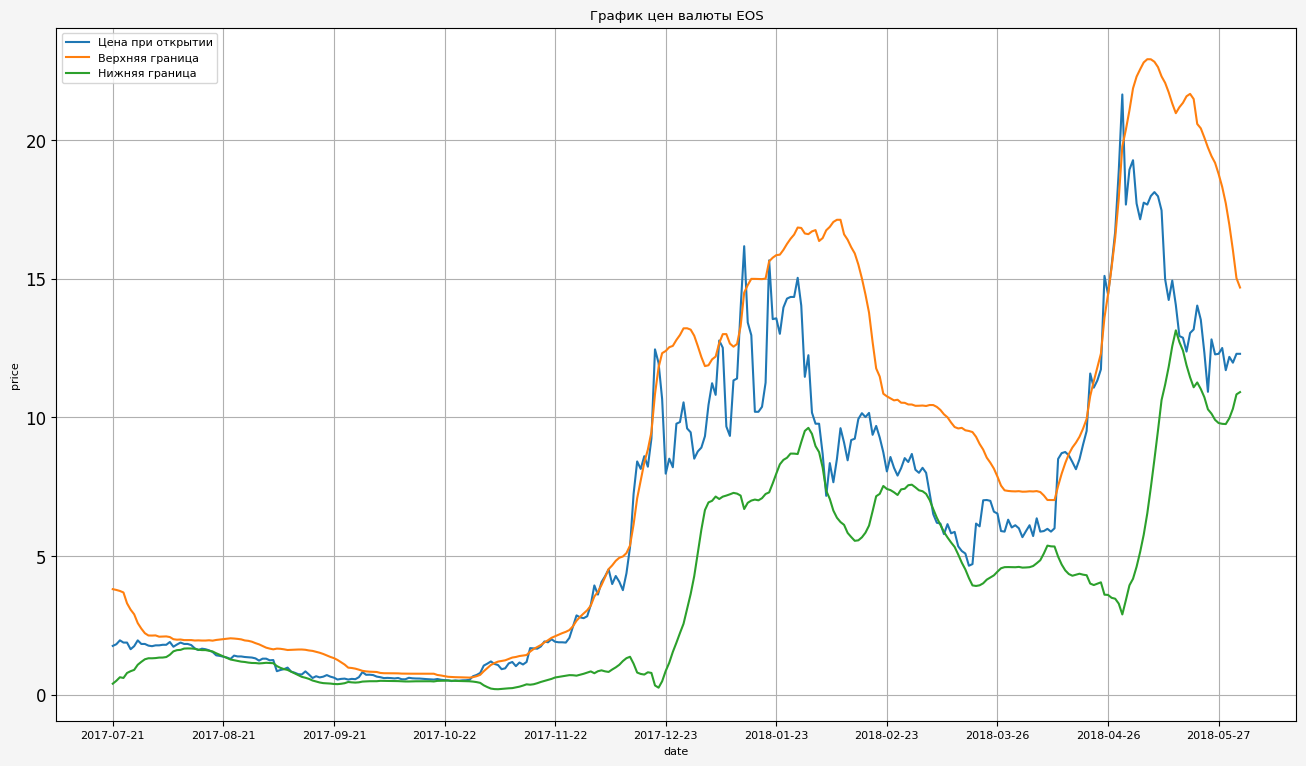

In [20]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ваш ответ тут:**

**По графику видно, что есть участки, на которых график цены практически совпадает с одной из границ Боллинджера. Следовательно, правило Боллинджера выполнялось не полностью.**

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [21]:
def plot_coins_capitalizations(coins, symbols, start_date):
    df = coins[coins['date'] >= start_date]
    df = pd.concat([df, df[df.isnull().any(axis = 1)]]).drop_duplicates(keep = False) # Выкидываем Nan значения
    fig = plt.figure(
        figsize=(16, 9),
        facecolor='whitesmoke',
        dpi=100
    )
    plt.title(f'График капитализации валют {", ".join(symbols)}')
    plt.xlabel("date")
    plt.ylabel("market")
    plt.rc('xtick', labelsize = 8)
    plt.rc('ytick', labelsize = 8)
    for symbol in symbols:
        plt.plot(
            df[df['symbol'] == symbol]['date'],
            df[df['symbol'] == symbol]['market'],
            label = symbol,
        )
    
    date_list = sorted(list(set(df['date'])))
    big_market_list = []

    for i in range(len(date_list)):
        big_market_list.append(sum(df[df['date'] == date_list[i]]['market']))

    second_df = pd.DataFrame({
        'date': date_list,
        'big_market': big_market_list,
    })
    
    x_ticks = df['date'][::len(df['date']) // 10]

    plt.legend()
    plt.xticks(ticks = x_ticks)
    plt.grid()
    plt.show()

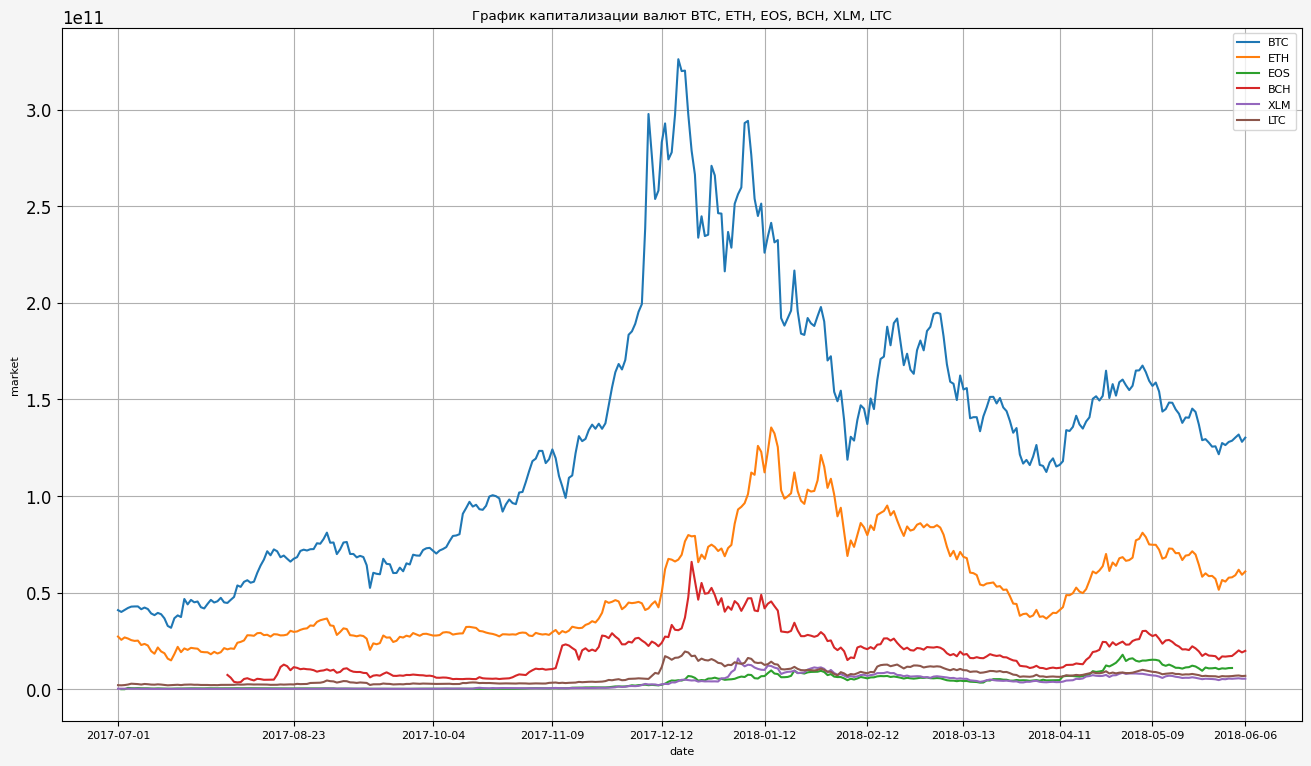

In [22]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

**Альткоины зависят от биткоина по причине образования первичного спроса на цифровую валюту вокруг него. Почти половина всех вложений в монеты приходится на BTC. Крупные инвестиционные портфели включают Bitcoin как базовый актив.**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [23]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    df = coins[(coins['date'] <= date) & (coins['symbol'].apply(lambda symb: symb in symbols))]
    df = pd.concat([df, df[df.isnull().any(axis = 1)]]).drop_duplicates(keep = False) # Выкидываем Nan
    markets_data = df.groupby(['date'])['market'].sum().values
    date_column = sorted(list(set(df['date'])))
    markets_df = pd.DataFrame(data = {
        'date': date_column,
        'market': markets_data,
    })
        
    answer = dict()
    for symbol in symbols:
        df_symbol = df[df['symbol'] == symbol]
        temp_market_list = []
        for temp_date in date_column:
            temp_request = df_symbol[df_symbol['date'] == temp_date]
            if len(temp_request) == 0:
                temp_market_list.append(0)
            else:
                temp_market_list.append(temp_request.iloc[0].market)
        df_symbol = pd.DataFrame(data = {
            'date': date_column,
            'market': temp_market_list,
        })
        df_symbol['market_r'] = df_symbol['market'] / markets_df['market']
        answer[symbol] = df_symbol['market_r'].ewm(span = window, adjust = False).mean()
    
    answer_df = pd.DataFrame(answer)
    return answer_df.corr()


In [24]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').format(precision = 2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.96,-0.70,-0.81,-0.80,0.03,-0.70
ETH,-0.96,1.00,0.53,0.65,0.65,-0.17,0.51
EOS,-0.70,0.53,1.00,0.72,0.91,0.07,0.83
BCH,-0.81,0.65,0.72,1.00,0.76,0.01,0.78
XLM,-0.80,0.65,0.91,0.76,1.00,0.04,0.94
LTC,0.03,-0.17,0.07,0.01,0.04,1.00,0.07
ADA,-0.70,0.51,0.83,0.78,0.94,0.07,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [25]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').format(precision = 2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.97,-0.71,-0.65,-0.81,0.13,-0.37
ETH,-0.97,1.00,0.59,0.50,0.80,-0.26,0.24
EOS,-0.71,0.59,1.00,0.78,0.59,-0.01,0.69
BCH,-0.65,0.50,0.78,1.00,0.50,-0.08,0.68
XLM,-0.81,0.80,0.59,0.50,1.00,-0.21,0.53
LTC,0.13,-0.26,-0.01,-0.08,-0.21,1.00,-0.05
ADA,-0.37,0.24,0.69,0.68,0.53,-0.05,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

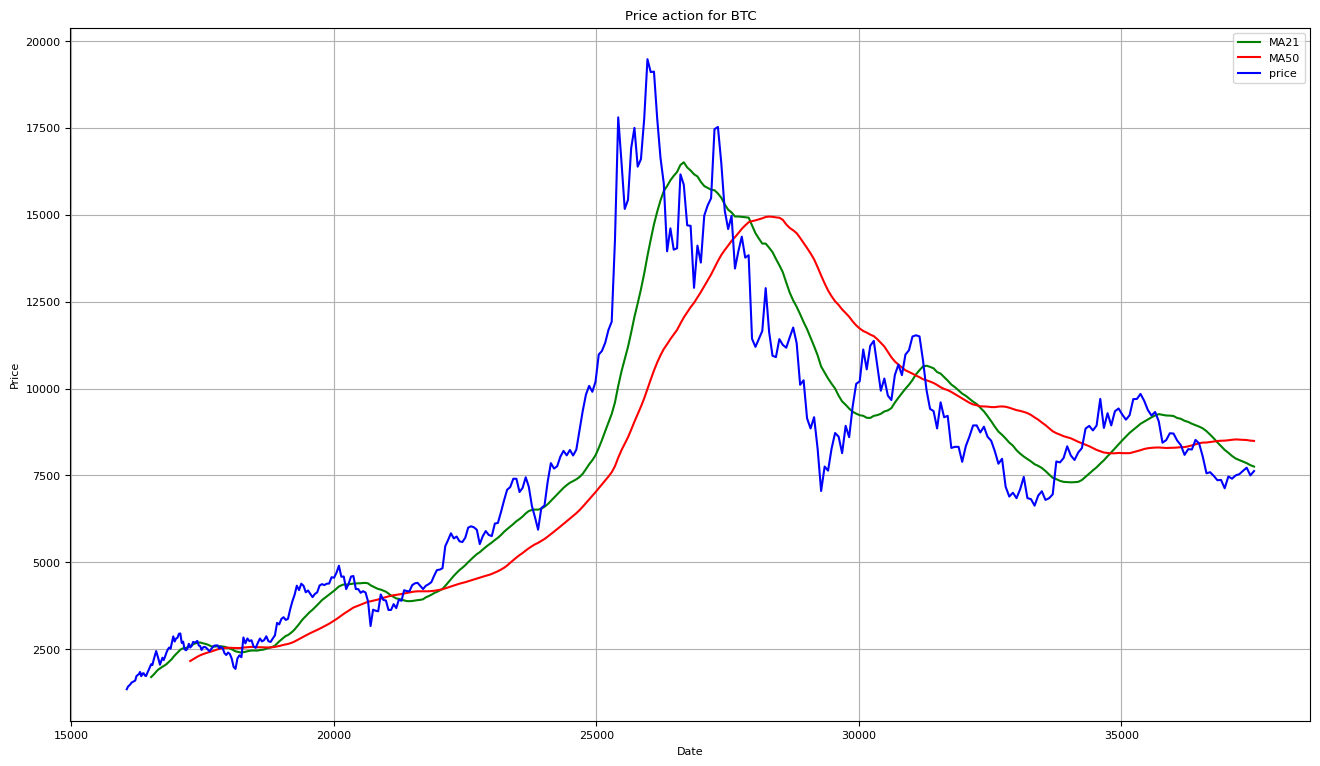

In [26]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [27]:
def plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date):
    fig = plt.figure(figsize = (32, 9))


    start_date = str(start_date).split()[0]
    end_date = str(end_date).split()[0]
    df = coins[coins['symbol'] == symbol]
    leading_mean = df['price'].rolling(window=lead_window).mean()
    lagging_mean = df['price'].rolling(window=lag_window).mean()
    df['leading_mean'] = leading_mean
    df['lagging_mean'] = lagging_mean
    df = pd.concat([df, df[df.isnull().any(axis = 1)]]).drop_duplicates(keep = False) # Выкидываем Nan значения

    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    if (len(df) == 0):
        print(f"Ошибка. Данных за этот период нет.")
        return
    start_sum = 1000000
    simple_sum = (start_sum / df[df['date'] == start_date].iloc[0].open) * max(df[df['date'] == end_date].iloc[0].open, df[df['date'] == end_date].iloc[0].close)
    simple_count = start_sum / df[df['date'] == start_date].iloc[0].open
    simple_column = []
    strategy_sum = 1000000
    strategy_column = []
    k = 50 # размер порции в 100% / k

    temp_count = 0

    for ind in df.index[1:]:
        row = df[df.index == ind]
        last_row = df[df['date'].shift(-1) == row.iloc[0].date].iloc[0]
   
        if ((last_row.leading_mean - last_row.lagging_mean) / last_row.close) >= threshold: # Покупаем 

            if (strategy_sum < start_sum / k):
                pass
            else:
                strategy_sum -= start_sum / k
                temp_count += (start_sum / k) / row.iloc[0].close
        elif ((last_row.lagging_mean - last_row.leading_mean) / last_row.close) >= threshold: # Продаём
            if temp_count < (start_sum / k) / row.iloc[0].close:
                pass
            else:
                temp_count -= (start_sum / k) / row.iloc[0].close
                strategy_sum += (start_sum / k)
        simple_column.append(simple_count * row.iloc[0].close)
        strategy_column.append(strategy_sum)
    if temp_count > 0:
        strategy_sum += temp_count * df.tail(1).iloc[0].close
        temp_count = 0
    strategy_column[-1] = strategy_sum
    print(f"При обычном инвестировании сумма составит: {simple_sum}")
    print(f"При стратегии сумма составит: {strategy_sum}")
    plt.subplot(1, 2, 1)
    plt.rc('font', size = 16)
    plt.rc('xtick', labelsize = 12)
    plt.rc('ytick', labelsize = 16)
    plt.title(f'Price action for {symbol}')
    plt.xlabel('date')
    plt.ylabel('price')
    plt.plot(
        df['date'],
        df['leading_mean'],
        label = f"MA{lead_window}"
    )
    plt.plot(
        df['date'],
        df['lagging_mean'],
        label = f"MA{lag_window}"
    )
    plt.plot(
        df['date'],
        df['price'],
        label = "Price",
    )
    x_ticks = df['date'][::len(df['date']) // 8]
    plt.xticks(ticks = x_ticks)
    plt.legend()
    plt.grid()

    
    plt.subplot(1, 2, 2)
    plt.title('Сравнение стратегий')
    plt.xlabel('date')
    plt.ylabel('Money Summ')
    plt.plot(
        df['date'][1:],
        simple_column,
        label = 'Обычное инвестирование'
    )
    plt.plot(
        df['date'][1:],
        strategy_column,
        label = 'Стратегия'
    )
    plt.grid()
    plt.legend()
    plt.xticks(ticks = x_ticks)
    plt.show()


In [28]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

**Для использования данной стратегии необходимо обладать большим опытом, т.к. для разных временных промежутков необходимо подбирать разные значения параметров, а новичок с большой долей вероятности сделает это неправильно.**

**Так же предположу, что данную стратегию целесообразнее всего использовать на малых временных промежутках, т.к. на них она даёт наибольшую разницу с прибылью от обычного инвестирования.**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.